# Last Journey Trees Statistics

In [1]:
import pickle
import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from astropy.cosmology import FlatLambdaCDM
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func

pyfftw not available, using numpy fft


In [2]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

In [5]:
forest_table

,halo_id,core_id,descendant_id,descendant_idx,snap_num,scale_factor,mass,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,vel_disp,vmax
0,0,189151665385897993,39,39,-1,0.0,12.505589,239.931320,56.717392,1.012712,-2739.481689,42.331478,1022.862854,615.841980,46.939880
1,1,189151665385897994,40,40,-1,0.0,12.968759,238.074356,13.763283,51.323349,3244.839844,542.072815,1806.814941,617.018250,49.016506
2,2,189151665385897997,41,41,-1,0.0,12.968759,236.403595,50.040001,34.322571,-1467.498413,-811.347839,865.836426,571.091370,46.939880
3,3,189151665385897999,42,42,-1,0.0,10.189739,230.741409,56.760719,27.385292,350.155670,-2139.127686,-392.172913,626.179626,47.873615
4,4,189151669680865283,43,43,-1,0.0,14.821438,232.472580,31.493774,75.120041,406.197754,-154.747910,-2121.640381,483.979340,46.939880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103073498,103073498,2247296759518732712,-1,-1,99,0.0,14.821438,248.682892,231.536179,221.147308,-255.809052,817.848267,-161.033798,126.123802,46.939880
103073499,103073499,2247296759518732731,-1,-1,99,0.0,9.263399,242.021912,188.110764,189.127228,-450.920227,5.376154,-2.719159,14.481251,49.403263
103073500,103073500,2247296759518732736,-1,-1,99,0.0,9.263399,244.477646,226.748779,198.966675,330.005951,615.086548,166.458557,112.463722,69.346581
103073501,103073501,2247296759518732745,-1,-1,99,0.0,9.263399,248.917862,240.694550,213.845276,-229.874283,153.587799,-303.309448,18.896959,46.939880


#### Establish Globals

In [3]:
n = 10
snap = 99
snap2 = 98
snap3 = 97
mm_thresh1 = 1/10
mm_thresh2 = 0.3
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins2 = [10**12, 10**12.5, 10**13, 10**13.5, 10**14, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

### 1) Mass Evolution

#### 1a) Full mass evolution: one halo

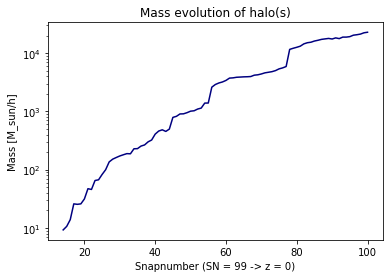

In [5]:
# Find just one halo
halo_idx = 6207994
xaxis = 'snap_nums'
# Track them
time_nums, masses, main_prog_list, major_mergers, mm_times = help_func.track_evol(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
# Plot them
help_func.plot_evol([time_nums], [masses], x_axis = xaxis, forest_tbl = forest_table)

In [8]:
forest_table.loc[forest_table.core_id == 270216497333272612]

,halo_id,core_id,descendant_id,descendant_idx,snap_num,scale_factor,mass,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,vel_disp,vmax
10500,10500,270216497333272612,12741,12741,13,0.0,9.263399,239.319061,178.113953,117.031647,797.532593,2275.105225,-1502.221558,330.219666,46.939880
12741,12741,270216497333272612,15674,15674,14,0.0,10.652908,239.322540,178.148972,116.986351,801.358765,1712.556641,-2225.939697,299.178101,46.939880
15674,15674,270216497333272612,19018,19018,15,0.0,13.895099,239.332199,178.170593,116.957565,701.983337,1623.865112,-2219.514160,276.185760,46.939880
19018,19018,270216497333272612,23196,23196,16,0.0,25.937517,239.339798,178.174133,116.849648,581.194336,1271.285156,-2633.764893,357.285522,46.939880
23196,23196,270216497333272612,28242,28242,17,0.0,25.474346,239.338455,178.217163,116.862297,775.739563,783.418640,-2433.531006,347.057983,53.867512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707049,5707049,270216497333272612,5830059,5830059,95,0.0,20393.466797,238.985352,183.991348,110.836739,469.581635,102.561272,-438.300568,137.926620,560.805725
5830059,5830059,270216497333272612,5954313,5954313,96,0.0,20770.623047,239.043823,184.113220,110.753418,0.033478,201.637711,50.019337,136.452652,575.847290
5954313,5954313,270216497333272612,6079969,6079969,97,0.0,21298.498047,239.096191,184.233826,110.662903,519.171570,174.740768,4.790894,143.535522,608.207092
6079969,6079969,270216497333272612,6207994,6207994,98,0.0,22419.251953,239.145081,184.360962,110.593887,-62.066051,13.879333,-487.217346,149.874664,643.141174


#### 1b) Full mass evolution: multiple halos

[6207994 6207215 6207587 6207223 6207360 6207238 6207466 6207226 6207285
 6207440]
In track_evol_multiple


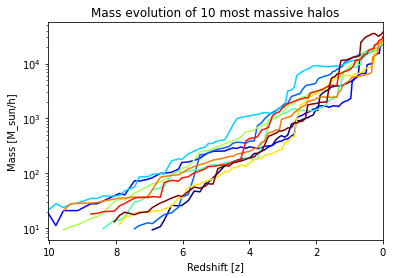

In [10]:
# Find some halos
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
print(halo_idx)
# Track them
z_nums, masses, main_prog_list, major_mergers, mm_times = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table)
# Plot them
help_func.plot_evol(z_nums, masses, "mass_evol_10_max_z", extremum = 'max', quant = n)

#### 1c) Average (binned) mass evolution

Index in track_evol_binned has length:  5
Index in track_evol_multiple has length:  30540
Index in track_evol_multiple has length:  90439
Index in track_evol_multiple has length:  10748
Index in track_evol_multiple has length:  1029
Index in track_evol_multiple has length:  44
Index in track_evol_binned has length:  5
Index in track_evol_multiple has length:  30540
Index in track_evol_multiple has length:  90439
Index in track_evol_multiple has length:  10748
Index in track_evol_multiple has length:  1029
Index in track_evol_multiple has length:  44


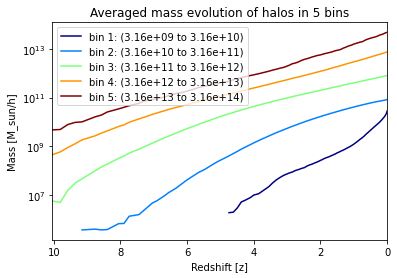

In [4]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, bins)
# Track evolution of those halos
#bin_z_nums, bin_masses, bin_main_prog_list, major_mergers = help_func.track_evol_binned(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table)
# Average the masses for each bin of halos
avg_timesteps, avg_masses = help_func.avg_bins(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table)
# Plot them
help_func.plot_evol(avg_timesteps, avg_masses, forest_table, "mass_evol_binned_avg", bins, avg = avg_tf)

#### 1d) Normalized average mass evolution

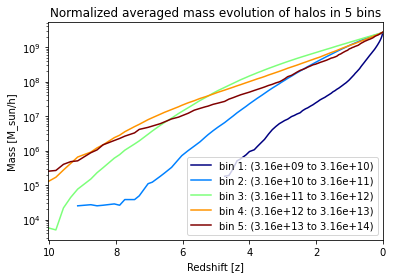

In [110]:
# Find halos and put them in bins
bin_halo_idx = help_func.bin_halos(forest_table, snap, bins)
# Average the masses for each bin of halos
norm_avg_timesteps, norm_avg_masses = help_func.avg_bins(bin_halo_idx, bins, redshifts, progenitor_idx, forest_table, norm_tf)
# Plot them
help_func.plot_evol(norm_avg_timesteps, norm_avg_masses, "mass_evol_binned", bins, avg_tf, norm_tf)

#### 1e) Tracking Major Mergers

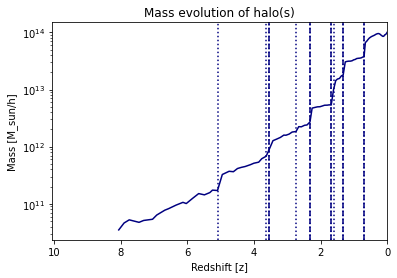

In [73]:
# Choose just one halo, and choose x-axis (z_nums or snap_nums)
halo_id = 6207440
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol(halo_id, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol([snap_nums], [masses], forest_table, major_mergers = [maj_mergers], x_axis = xaxis)

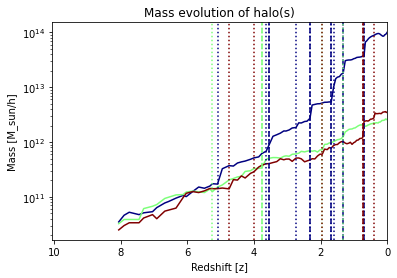

In [4]:
#halo_id = 6207440
halo_idx = [6207440, 6207441, 6207442]
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, prog_idx = progenitor_idx, forest_tbl = forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)
# Plot them
help_func.plot_evol(snap_nums, masses, forest_table, major_mergers = maj_mergers, x_axis = xaxis)

##### Am I sure that it's just a coincidence that all these halos end at exactly z = 8?

### 2) Redshift of LMM (Last Major Merger)

#### Implement for halos in a single range (no bins)

In [7]:
my_range1 = [10**12, 10**13]
halo_idx = help_func.find_halos(forest_table, snap, n, mass_range = my_range1)
xaxis = 'z_nums'
# Track the halo
a_snap_nums, a_masses, a_main_prog_list, a_maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [61]:
# Find the LMMs
a_LMMs, a_LMM_snapnums = help_func.find_LMMs(a_maj_mergers, forest_table, xaxis)

len(LMM_times) in plot_LMMs:  1
len(LMM_times[0]) in plot_LMMs:  3317
LMM_times[0] is:  [1.4334 1.68   2.018  ... 3.4273 0.9143 1.1069]
range of bins:  [0]
norm_factor:  3317


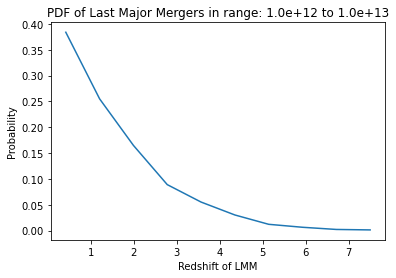

In [25]:
# Plot the PDF
help_func.plot_LMMs([a_LMM_snapnums], mass_range = my_range1, x_axis = xaxis)

#### Implement for bins (WIP)

In [63]:
# Find and bin the halos
my_bins = [10**13, 10**13.5, 10**14, 10**14.5]
bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [64]:
LMMs, LMM_times = help_func.find_LMMs_binned(maj_mergers, forest_table, xaxis, redshifts)

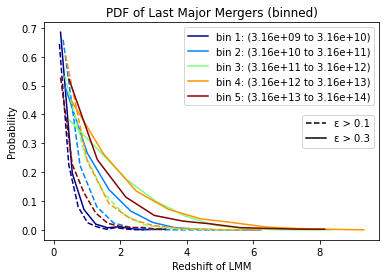

In [66]:
# Plot the PDF
help_func.plot_LMMs(LMM_times, mass_bins = large_bins, x_axis = xaxis)

### Compare this to the individual plots of these ranges

len(major_mergers) in find_LMMs:  392
len(major_mergers[0]) in find_LMMs:  1
major_mergers[0] in find_LMMs:  [1942377]
len(LMM_list) in find_LMMs:  392
norm_factor:  392


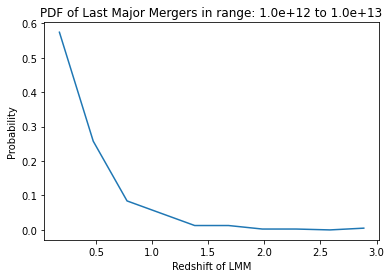

In [13]:
my_range2 = [10**9.5, 10**10.5] # [10**10.5, 10**11.5], [10**11.5, 10**12.5], [10**12.5, 10**13.5], [10**13.5, 10**14.5]
halo_idx2 = help_func.find_halos(forest_table, snap, n, mass_range = my_range2)
xaxis = 'z_nums'
# Track the halo
snap_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)
# Find the LMMs
LMMs, LMM_snapnums = help_func.find_LMMs(maj_mergers, forest_table, xaxis)
# Plot the PDF
help_func.plot_LMMs([LMM_snapnums], mass_range = my_range1, x_axis = xaxis)

#### Plot CDF (Cumulative Distribution Function)

In [4]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, small_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, small_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [8]:
len(bin_halo_idx[2])

1737

In [9]:
binned_LMMs, binned_LMM_times = help_func.find_LMMs_binned(binned_maj_mergers, forest_table, xaxis)

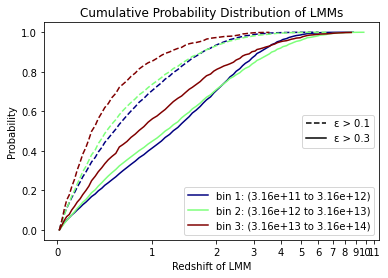

In [10]:
help_func.plot_CDF(binned_LMM_times, small_bins, redshifts)

### 3) Mass Growth Rate

#### Run the function (for non-binned idx of halo ids)

In [67]:
# Find some halos in a range
range1 = [10**13, 10**14]
halo_idx = help_func.find_halos(forest_table, snap, mass_range = range1)

In [68]:
len(halo_idx)

6197

In [69]:
# Track their evolution
%time
timesteps, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 21.7 µs


In [70]:
# Calculate the alphas
%time alphas = help_func.calc_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)

len(alpha_list):  6197
len(alpha_list[0]):  50
CPU times: user 402 ms, sys: 25.3 ms, total: 427 ms
Wall time: 377 ms


In [71]:
len(alphas[2])

38

No handles with labels found to put in legend.


for h:  0  hist is:  (array([     3,      1,      3,      8,     12,     47,    182,   1280,
        10284,  62155, 142670,  73837,  21331,   8823,   5102,   3604,
         2615,   2061,   1696,   1471]), array([-9.53816984, -8.56126759, -7.58436534, -6.60746309, -5.63056084,
       -4.65365859, -3.67675634, -2.6998541 , -1.72295185, -0.7460496 ,
        0.23085265,  1.2077549 ,  2.18465715,  3.1615594 ,  4.13846165,
        5.1153639 ,  6.09226615,  7.06916839,  8.04607064,  9.02297289,
        9.99987514]))
sum(hist[0]):  337185
len(all_values):  347140


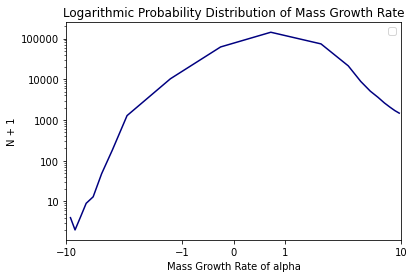

In [74]:
# Plot them
a = help_func.plot_distrib([alphas], "Mass Growth Rate", "alpha", n_hist_bins = 20, zoom = True, log = True)

#### Attempt with bins

In [80]:
# Find some halos and put them in bins
my_bins = large_bins2
%time bin_halo_idx = help_func.bin_halos(forest_table, snap, my_bins)

CPU times: user 523 ms, sys: 91.7 ms, total: 614 ms
Wall time: 191 ms


In [81]:
# Track their evolution
%time bin_timesteps, bin_masses, bin_main_prog_list, bin_maj_mergers = help_func.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

CPU times: user 3min 42s, sys: 3.19 s, total: 3min 45s
Wall time: 3min 45s


In [82]:
# Calculate the alphas
%time binned_alphas = help_func.calc_BINNED_mass_growth_rate(bin_timesteps, bin_masses, bin_main_prog_list, progenitor_idx, forest_table)

len(alpha_list):  40628
len(alpha_list[0]):  56
len(alpha_list):  14286
len(alpha_list[0]):  49
len(alpha_list):  4797
len(alpha_list[0]):  69
len(alpha_list):  1400
len(alpha_list[0]):  55
len(alpha_list):  337
len(alpha_list[0]):  62
len(total_alpha_list):  5
len(total_alpha_list[0]):  40628
len(total_alpha_list[0][0]):  56
CPU times: user 3.35 s, sys: 584 ms, total: 3.93 s
Wall time: 3.71 s


for h:  0  hist is:  (array([    17,     19,     27,     30,     32,     58,     74,    122,
          245,    702,   2234,   7479,  23768,  65764, 142707, 200255,
       168771,  90141,  36396,  13852,   6485,   3906,   2680,   1967,
         1595,   1280,   1063,    902,    673,    663]), array([-9.91089215, -9.24720187, -8.5835116 , -7.91982132, -7.25613104,
       -6.59244077, -5.92875049, -5.26506021, -4.60136994, -3.93767966,
       -3.27398938, -2.6102991 , -1.94660883, -1.28291855, -0.61922827,
        0.044462  ,  0.70815228,  1.37184256,  2.03553283,  2.69922311,
        3.36291339,  4.02660366,  4.69029394,  5.35398422,  6.01767449,
        6.68136477,  7.34505505,  8.00874532,  8.6724356 ,  9.33612588,
        9.99981615]))
sum(hist[0]):  773907
len(all_values):  778705
for h:  1  hist is:  (array([    18,     21,     29,     33,     40,     67,     89,    155,
          318,    926,   2970,  10434,  34466, 100754, 235229, 359857,
       314841, 165617,  66688,  27017,  136

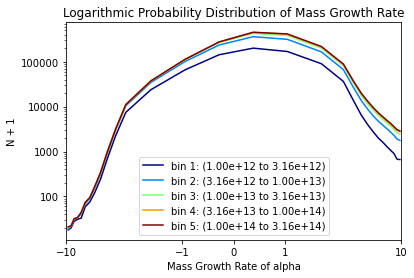

In [83]:
# Plot them
a = help_func.plot_distrib(binned_alphas, "Mass Growth Rate", "alpha", large_bins2, n_hist_bins = 30, zoom = True, log = True)

### 4) Length of Main Branches

In [5]:
# Find and bin the halos
bin_halo_idx = help_func.bin_halos(forest_table, snap, rangel_bins2)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
def avg_bins(idx, bins, redshifts, prog_idx, forest_tbl, mm_thresh_small = 0.1, mm_thresh_big = 0.3, normalized = False, x_axis = 'z_nums')
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, rangel_bins2, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [6]:
len(bin_halo_idx[11])

6838

In [14]:
ex_bin_halo_idx = help_func.bin_halos(forest_table, snap, [8*10**12, 10**19])

In [15]:
len(ex_bin_halo_idx[0])

8331

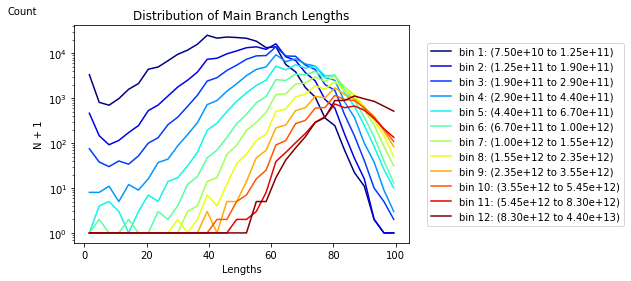

In [85]:
help_func.plot_main_branch_length(binned_main_prog_list, hist_bins = rangel_bins2, log = True)

#### Just one bin

In [81]:
# Find some halos
halo_idx = help_func.find_halos(forest_table, snap, mass_range = [8.3*10**12, 4.4*10**13])
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table)

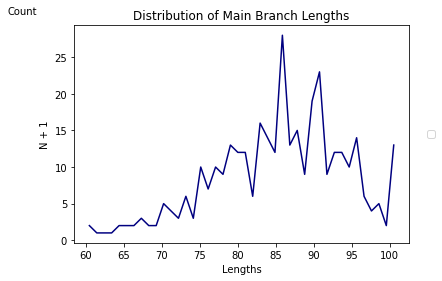

In [153]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'dist')

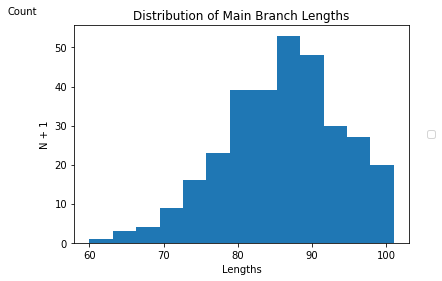

In [158]:
help_func.plot_main_branch_length([main_prog_list], log = False, dist_or_hist = 'hist', n_bins = 'auto')

#### Or, PDF (a little funky currently)

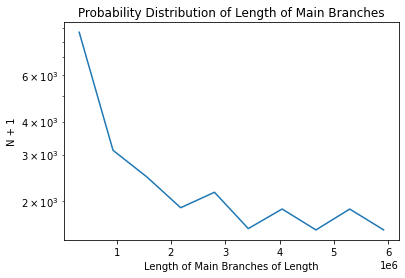

In [142]:
help_func.plot_distrib(main_prog_list, "Length of Main Branches", "Length")

### 5) Mean Number of Mergers (Cumulative)

#### For just one range of halos

In [22]:
# Find some halos
halo_id = 6207994
# Track them
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol(halo_id, redshifts, progenitor_idx, forest_table)

In [40]:
z_nums, masses, main_prog_list, major_mergers = help_func.track_evol(halo_id, redshifts, progenitor_idx, forest_table)

In [35]:
%lprun -f help_func.calc_cum_maj_mergers cum_mms = help_func.calc_cum_maj_mergers(major_mergers, redshifts, forest_table)

Timer unit: 1e-06 s

Total time: 2.00581 s
File: /data/a/cpac/aurora/help_func.py
Function: calc_cum_maj_mergers at line 463

Line #      Hits         Time  Per Hit   % Time  Line Contents
   463                                           def calc_cum_maj_mergers(major_mergers, redshifts, forest_tbl): # Note: assume major_mergers is for just one halo
   464                                               
   465                                               # For each threshold, find redshifts associated with the major mergers
   466         1    2004464.0 2004464.0     99.9      MM_times = [redshifts[99 - forest_tbl['snap_num'][major_mergers[i]]] for i in range(len(major_mergers))]
   467                                               
   468                                               # For all redshifts z, count # of mms that took place between 0 and z
   469         1        513.0    513.0      0.0      mask = [[[(MM_times[i][j] <= z) for j in range(len(MM_times[i]))] for z in redshi

#### So the bottleneck is clearly with line 466. Let's test that

In [43]:
%prun MM_times = [redshifts[99 - forest_table['snap_num'][major_mergers[i]]] for i in range(len(major_mergers))]

         4265 function calls (4237 primitive calls) in 2.008 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        8    0.810    0.101    0.810    0.101 {method 'astype' of 'numpy.ndarray' objects}
        4    0.564    0.141    0.564    0.141 base.py:1646(is_unique)
       10    0.402    0.040    0.402    0.040 {pandas._libs.lib.infer_dtype}
        2    0.112    0.056    1.047    0.524 base.py:4700(get_indexer_for)
        2    0.110    0.055    0.958    0.479 base.py:3291(reindex)
        8    0.002    0.000    0.813    0.102 base.py:625(astype)
        8    0.001    0.000    0.403    0.050 base.py:2000(inferred_type)
       12    0.000    0.000    0.002    0.000 base.py:293(__new__)
     1016    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
        1    0.000    0.000    2.008    2.008 {built-in method builtins.exec}
      8/4    0.000    0.000    1.782    0.446 base.py:2957(get_indexer)
     

##### Not gonna lie, that was not super helpful

#### For multiple halos

In [29]:
n = 10
halo_idx = help_func.find_halos(forest_table, snap, n, extremum = 'max')
xaxis = 'z_nums'
#z_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)

In [30]:
z_nums, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, mm_thresh_small = mm_thresh1, mm_thresh_big = mm_thresh2, x_axis = xaxis)

In [31]:
%lprun -f help_func.avg_cum_maj_mergers averages = help_func.avg_cum_maj_mergers(maj_mergers, redshifts, forest_table)

In avg_cum_maj_mergers


Timer unit: 1e-06 s

Total time: 19.4501 s
File: /data/a/cpac/aurora/help_func.py
Function: avg_cum_maj_mergers at line 479

Line #      Hits         Time  Per Hit   % Time  Line Contents
   479                                           def avg_cum_maj_mergers(major_mergers, redshifts, forest_tbl): # Note: assume major_mergers contains multiple halos
   480                                               
   481         1        241.0    241.0      0.0      print("In avg_cum_maj_mergers")
   482         1   19449569.0 19449569.0    100.0      cum_mms = [calc_cum_maj_mergers(major_mergers[i], redshifts, forest_tbl) for i in range(len(major_mergers))] # One for each halo # Is this (list comprehension + a function call) actually faster than a for loop?
   483         1        320.0    320.0      0.0      avg = [np.average([cum_mms[i][j] for i in np.arange(len(cum_mms))], axis = 0) for j in range(len(cum_mms[0]))] # Kind of cheating... hard-coded
   484         1          1.0      1.0      0

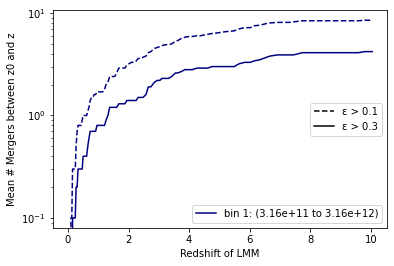

In [131]:
help_func.plot_mean_num_mms([averages], small_bins, redshifts)

#### For binned halos

##### Gahhh why are you so slowww

In [86]:
# Find and bin the halos
#my_bins = [10**13.2, 10**13.5, 10**14.5]
bin_halo_idx = help_func.bin_halos(forest_table, snap, small_bins)
# Track them (and take their averages in the process)
xaxis = 'z_nums'
#%lprun -f help_func.track_evol_binned
binned_snap_nums, binned_masses, binned_main_prog_list, binned_maj_mergers = help_func.track_evol_binned(bin_halo_idx, small_bins, redshifts, progenitor_idx, forest_table, x_axis = xaxis)

In [1]:
%prun binned_avgs = help_func.binned_avg_cum_maj_mergers(binned_maj_mergers, redshifts, forest_table)

NameError: name 'help_func' is not defined

In [ ]:
help_func.plot_mean_num_mms(binned_avgs, my_bins, redshifts)

### Various Experiments

In [63]:
mask = [(mm_times[i] <= 3) for i in np.arange(len(mm_times))]
mask

[True, True, False, True, True, False]

In [68]:
mask.count(True)

4

In [8]:
mask = [(mm_times[i] <= z) for i, z in zip(np.arange(len(mm_times)), redshifts)]
mask

[False, False, False, True, False, False]

In [96]:
a = [0, 0, 1, 1, 2, 3, 5, 6, 8]
b = [0, 1, 1, 1, 1, 2, 6, 7, 7]
c = [1, 1, 2, 3, 3, 4, 5, 6, 7]
d = [1, 2, 2, 2, 3, 3, 4, 5, 6]
e = [[a,b], [c,d]]
print(e)
np.average(e, axis = 0)
#sum(ab)
#mean(a, b)

[[[0, 0, 1, 1, 2, 3, 5, 6, 8], [0, 1, 1, 1, 1, 2, 6, 7, 7]], [[1, 1, 2, 3, 3, 4, 5, 6, 7], [1, 2, 2, 2, 3, 3, 4, 5, 6]]]


array([[0.5, 0.5, 1.5, 2. , 2.5, 3.5, 5. , 6. , 7.5],
       [0.5, 1.5, 1.5, 1.5, 2. , 2.5, 5. , 6. , 6.5]])

In [100]:
[e[i][0] for i in np.arange(len(e))]

[[0, 0, 1, 1, 2, 3, 5, 6, 8], [1, 1, 2, 3, 3, 4, 5, 6, 7]]

### Histogram experiments

In [168]:
a = [1, 1, 2, 5, 0, 9, 0, 0, 8, 7, 1]
nbins = np.max(a) - np.min(a)
print(nbins)
hist = np.histogram(a, bins = nbins)
hist

9


(array([3, 3, 1, 0, 0, 1, 0, 1, 2]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [169]:
bin_centers = [(hist[1][i] + hist[1][i + 1])/2 for i in np.arange(len(hist[1]) - 1)]
bin_centers

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]

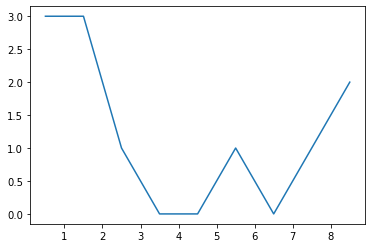

In [170]:
fig, ax = plt.subplots()
ax.plot(bin_centers, hist[0])